In [5]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import us
import sklearn.preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

'''Return USA States'''
def get_us_states():
    US_States = []
    for state in us.STATES:
        US_States.append(str(state))
    return US_States

'''Read the Data For Term Skin Cancer from 2011-2016'''
def read_Skin_Cancer():
    temp = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Skin_Cancer\\2011.csv')
    temp = temp.iloc[2:,:]
    temp1 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Skin_Cancer\\2012.csv')
    temp1 = temp1.iloc[2:,:]
    temp2 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Skin_Cancer\\2013.csv')
    temp2 = temp2.iloc[2:,:]
    temp3 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Skin_Cancer\\2014.csv')
    temp3 = temp3.iloc[2:,:]
    temp4 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Skin_Cancer\\2015.csv')
    temp4 = temp4.iloc[2:,:]
    temp5 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Skin_Cancer\\2016.csv')
    temp5 = temp5.iloc[2:,:]
    return temp,temp1,temp2,temp3,temp4,temp5


'''Read the Data For Term Melanoma from 2011-2016'''
def read_melanoma():
    temp = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Melanoma\\M_2011.csv')
    temp = temp.iloc[2:,:]
    temp1 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Melanoma\\M_2012.csv')
    temp1 = temp1.iloc[2:,:]
    temp2 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Melanoma\\M_2013.csv')
    temp2 = temp2.iloc[2:,:]
    temp3 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Melanoma\\M_2014.csv')
    temp3 = temp3.iloc[2:,:]
    temp4 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Melanoma\\M_2015.csv')
    temp4 = temp4.iloc[2:,:]
    temp5 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Melanoma\\M_2016.csv')
    temp5 = temp5.iloc[2:,:]
    return temp,temp1,temp2,temp3,temp4,temp5

'''Read the Data For Term Melanoma from 2011-2016'''
def read_Carcinoma():
    temp = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Carcinoma\\C_2011.csv')
    temp = temp.iloc[2:,:]
    temp1 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Carcinoma\\C_2012.csv')
    temp1 = temp1.iloc[2:,:]
    temp2 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Carcinoma\\C_2013.csv')
    temp2 = temp2.iloc[2:,:]
    temp3 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Carcinoma\\C_2014.csv')
    temp3 = temp3.iloc[2:,:]
    temp4 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Carcinoma\\C_2015.csv')
    temp4 = temp4.iloc[2:,:]
    temp5 = pd.read_csv(str(os.getcwd())+'\\Google_Data\\Carcinoma\\C_2016.csv')
    temp5 = temp5.iloc[2:,:]
    return temp,temp1,temp2,temp3,temp4,temp5

'''Read and Prepare Ground Truth Data'''
def read_ground(file_name):
    Path = str(os.getcwd())+'\\Ground\\'+file_name
    temp = pd.read_csv(Path)
    temp = temp[['LocationDesc','Data_Value','Low_Confidence_Limit','High_Confidence_Limit']]
    temp.drop(temp.index[51:],inplace=True)
    return temp

'''Find Correlation between two Lists'''
def find_correlation(Array1,Array2):
    return np.corrcoef(Array1,Array2)[0,1]

'''Scale the Features'''
def min_max_scale(X_train):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    return min_max_scaler.fit_transform(X_train)

'''Perform Ordinary Least Square'''
def ordinary_least_square(X_train,y_train,X_test,y_test):
    reg = linear_model.LinearRegression(normalize=True)
    reg.fit(X_train,y_train)
    return reg.score(X_train,y_train),reg.score(X_test,y_test)

'''Perform SVM for Regression'''
def SVM(X_train,y_train,X_test,y_test):
    clf = SVR(kernel='poly',C=5.01, epsilon=0.2)
    clf.fit(X_train,y_train)
    return clf.score(X_train,y_train),clf.score(X_test,y_test)

'''Perform Random Forest for regression'''
def ensemble_learning(X_train,y_train,X_test,y_test):
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    clf = regr.fit(X_train,y_train)
    return clf.score(X_train,y_train),clf.score(X_test,y_test)

'''Perform Random Forest for regression'''
def random_forest(X_train,y_train,X_test,y_test):
    regr = RandomForestRegressor(max_depth=5, random_state=0)
    clf = regr.fit(X_train,y_train)
    return clf.score(X_train,y_train),clf.score(X_test,y_test),regr

'''Build Data Sets wrt Years'''
def Build_Data_Sets(Data):
    Years = ['2011','2012','2013','2014','2015','2016']
    Data_Sets = []
    for year in Years:
        Columns = []
        for column in Data.columns:
            if year in column:
                Columns.append(column)
        Data_Sets.append(Data[Columns])
    return Data_Sets

'''Perform SVM Regression with Spatial and Temporal Cross Validation for Age Adjusted Skin Cancer'''
def SVM_Regression_Age_Adjusted(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2]]
        G_1 = df.iloc[:35,3]
        SVM = SVR(C=1)
        kernels = ['rbf','linear','poly']
        alphas = [1.0,2.0,3.0,4.0,5.0]
        tuned_parameters = [{'kernel': kernels},{'C': alphas}]
        n_folds = 5
        clf = GridSearchCV(SVM, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,3]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2]]),index=temp.index)
        Pred.append(temp)
    return Pred

'''Perform SVM Regression with Spatial and Temporal Cross Validation for Crude Skin Cancer'''
def SVM_Regression_Crude(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2]]
        G_1 = df.iloc[:35,4]
        SVM = SVR(C=1)
        kernels = ['rbf','linear','poly']
        alphas = [1.0,2.0,3.0,4.0,5.0]
        tuned_parameters = [{'kernel': kernels},{'C': alphas}]
        n_folds = 5
        clf = GridSearchCV(SVM, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,3]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2]]),index=temp.index)
        Pred.append(temp)
    return Pred

'''Perform Lasso Regression with Spatial and Temporal Cross Validation for Age Adjusted Skin Cancer'''
def lasso_Regression_Age_Adjusted_Income(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2,3]]
        G_1 = df.iloc[:35,4]
        lasso = Lasso(fit_intercept=True,random_state=None,max_iter=20000)
        #kernels = ['rbf','linear','poly']
        alphas = [0.1,0.5,0.8,1.0,1.5,2.0]
        tuned_parameters = [{'alpha': alphas}]
        n_folds = 5
        clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,4]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2,3]]),index=temp.index)
        Pred.append(temp)
    return Pred

'''Perform Lasso Regression with Spatial and Temporal Cross Validation for Crude Skin Cancer'''
def lasso_Regression_Crude_Income(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2,3]]
        G_1 = df.iloc[:35,5]
        lasso = Lasso(fit_intercept=True,random_state=None,max_iter=20000)
        #kernels = ['rbf','linear','poly']
        alphas = [0.1,0.5,0.8,1.0,1.5,2.0]
        tuned_parameters = [{'alpha': alphas}]
        n_folds = 5
        clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,5]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2,3]]),index=temp.index)
        Pred.append(temp)
    return Pred


'''Calculate MAE'''
def MAE(df):
    return abs(np.array(df.iloc[:,0],dtype=float)-np.array(df.iloc[:,1],dtype=float))

'''Lasso Regression'''
def lasso_Regression_Age_Adjusted(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2]]
        G_1 = df.iloc[:35,3]
        lasso = Lasso(fit_intercept=True,random_state=None,max_iter=20000)
        #kernels = ['rbf','linear','poly']
        alphas = [0.1,0.5,0.8,1.0,1.5,2.0]
        tuned_parameters = [{'alpha': alphas}]
        n_folds = 5
        clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,3]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2]]),index=temp.index)
        Pred.append(temp)
    return Pred

def lasso_Regression_Crude(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2]]
        G_1 = df.iloc[:35,4]
        lasso = Lasso(fit_intercept=True,random_state=None,max_iter=20000)
        #kernels = ['rbf','linear','poly']
        alphas = [0.1,0.5,0.8,1.0,1.5,2.0]
        tuned_parameters = [{'alpha': alphas}]
        n_folds = 5
        clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,3]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2]]),index=temp.index)
        Pred.append(temp)
    return Pred


'''Perform Lasso Regression with Spatial and Temporal Cross Validation for Age Adjusted Skin Cancer'''
def lasso_Regression_Age_Adjusted_Income(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2,3]]
        G_1 = df.iloc[:35,4]
        lasso = Lasso(fit_intercept=True,random_state=None,max_iter=20000)
        #kernels = ['rbf','linear','poly']
        alphas = [0.1,0.5,0.8,1.0,1.5,2.0]
        tuned_parameters = [{'alpha': alphas}]
        n_folds = 5
        clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,4]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2,3]]),index=temp.index)
        Pred.append(temp)
    return Pred

'''Perform Lasso Regression with Spatial and Temporal Cross Validation for Crude Skin Cancer'''
def lasso_Regression_Crude_Income(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2,3]]
        G_1 = df.iloc[:35,5]
        lasso = Lasso(fit_intercept=True,random_state=None,max_iter=20000)
        #kernels = ['rbf','linear','poly']
        alphas = [0.1,0.5,0.8,1.0,1.5,2.0]
        tuned_parameters = [{'alpha': alphas}]
        n_folds = 5
        clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,5]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2,3]]),index=temp.index)
        Pred.append(temp)
    return Pred
'''Perform Lasso Regression with Spatial and Temporal Cross Validation for Age Adjusted Skin Cancer'''
def lasso_Regression_Age_Adjusted_Health(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2,3,4]]
        G_1 = df.iloc[:35,5]
        lasso = Lasso(fit_intercept=True,random_state=None,max_iter=20000)
        #kernels = ['rbf','linear','poly']
        alphas = [0.1,0.5,0.8,1.0,1.5,2.0]
        tuned_parameters = [{'alpha': alphas}]
        n_folds = 5
        clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,5]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2,3,4]]),index=temp.index)
        Pred.append(temp)
    return Pred

'''Perform Lasso Regression with Spatial and Temporal Cross Validation for Crude Skin Cancer'''
def lasso_Regression_Crude_Health(Data_Sets):
    Pred = []
    for df in Data_Sets:
        X = df.iloc[:35,[0,1,2,3,4]]
        G_1 = df.iloc[:35,6]
        lasso = Lasso(fit_intercept=True,random_state=None,max_iter=20000)
        #kernels = ['rbf','linear','poly']
        alphas = [0.1,0.5,0.8,1.0,1.5,2.0]
        tuned_parameters = [{'alpha': alphas}]
        n_folds = 5
        clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
        regr1 = clf.fit(X,G_1)
        temp = pd.DataFrame()
        temp['Age Adjusted True'] = df.iloc[35:,6]
        temp['Age Adjusted Predicted'] = pd.Series(regr1.predict(df.iloc[35:,[0,1,2,3,4]]),index=temp.index)
        Pred.append(temp)
    return Pred

##1.1

In [6]:
'''Preprocessing the Skin Cancer Data for Further Analysis and Prediction'''
Skin_Cancer = read_Skin_Cancer()
Skin_Cancer_DF = pd.DataFrame(np.zeros((len(Skin_Cancer[0]),2)))
Skin_Cancer_DF['States'] = pd.Series(list(Skin_Cancer[0].iloc[:,0]),dtype=str)
del Skin_Cancer_DF[0]
del Skin_Cancer_DF[1]
Skin_Cancer_DF.drop(Skin_Cancer_DF.index[0],inplace=True)
Skin_Cancer_DF['2011']=pd.Series(list(Skin_Cancer[0].iloc[:,1]))
Skin_Cancer_DF['2012']=pd.Series(list(Skin_Cancer[0].iloc[:,1]))
Skin_Cancer_DF['2013']=pd.Series(list(Skin_Cancer[0].iloc[:,1]))
Skin_Cancer_DF['2014']=pd.Series(list(Skin_Cancer[0].iloc[:,1]))
Skin_Cancer_DF['2015']=pd.Series(list(Skin_Cancer[0].iloc[:,1]))
Skin_Cancer_DF['2016']=pd.Series(list(Skin_Cancer[0].iloc[:,1]))
for i in range(Skin_Cancer_DF.shape[0]):
    for j in range(len(Skin_Cancer[1].index)):
        if Skin_Cancer_DF.iloc[i,0]==Skin_Cancer[1].index[j]:
            Skin_Cancer_DF.iloc[i,2] = int(Skin_Cancer[1].iloc[j,0])
for i in range(Skin_Cancer_DF.shape[0]):
    for j in range(len(Skin_Cancer[2].index)):
        if Skin_Cancer_DF.iloc[i,0]==Skin_Cancer[2].index[j]:
            Skin_Cancer_DF.iloc[i,3] = int(Skin_Cancer[2].iloc[j,0])
for i in range(Skin_Cancer_DF.shape[0]):
    for j in range(len(Skin_Cancer[3].index)):
        if Skin_Cancer_DF.iloc[i,0]==Skin_Cancer[3].index[j]:
            Skin_Cancer_DF.iloc[i,4] = int(Skin_Cancer[3].iloc[j,0])
for i in range(Skin_Cancer_DF.shape[0]):
    for j in range(len(Skin_Cancer[4].index)):
        if Skin_Cancer_DF.iloc[i,0]==Skin_Cancer[4].index[j]:
            Skin_Cancer_DF.iloc[i,5] = int(Skin_Cancer[4].iloc[j,0])
for i in range(Skin_Cancer_DF.shape[0]):
    for j in range(len(Skin_Cancer[5].index)):
        if Skin_Cancer_DF.iloc[i,0]==Skin_Cancer[5].index[j]:
            Skin_Cancer_DF.iloc[i,6] = int(Skin_Cancer[5].iloc[j,0])
Skin_Cancer_DF.loc[51] = ['Nevada']+list(np.array(Skin_Cancer_DF.iloc[:,1:].median(),dtype=int))
del Skin_Cancer

In [7]:
'''Preprocessing the Melanoma Data for Further Analysis and Prediction'''
States = get_us_states()
Missing = []
Melanoma = read_melanoma()
for i in range(len(Melanoma)):
    for state in States:
        if state not in list(Melanoma[i].index):
            Missing.append(state)
for i in range(len(Melanoma)):
    Melanoma[i].loc[Missing[i]] = int(Melanoma[i].iloc[:,0].median())
Melanoma_DF = pd.DataFrame(np.zeros((len(Melanoma[0]),2)))
Melanoma_DF['States'] = pd.Series(list(Melanoma[0].index))
del Melanoma_DF[0]
del Melanoma_DF[1]
Melanoma_DF['2011']=pd.Series(list(Melanoma[0].iloc[:,0]))
Melanoma_DF['2012']=pd.Series(list(Melanoma[0].iloc[:,0]))
Melanoma_DF['2013']=pd.Series(list(Melanoma[0].iloc[:,0]))
Melanoma_DF['2014']=pd.Series(list(Melanoma[0].iloc[:,0]))
Melanoma_DF['2015']=pd.Series(list(Melanoma[0].iloc[:,0]))
Melanoma_DF['2016']=pd.Series(list(Melanoma[0].iloc[:,0]))
for i in range(Melanoma_DF.shape[0]):
    for j in range(len(Melanoma[1].index)):
        if Melanoma_DF.iloc[i,0]==Melanoma[1].index[j]:
            Melanoma_DF.iloc[i,2] = int(Melanoma[1].iloc[j,0])
for i in range(Melanoma_DF.shape[0]):
    for j in range(len(Melanoma[2].index)):
        if Melanoma_DF.iloc[i,0]==Melanoma[2].index[j]:
            Melanoma_DF.iloc[i,3] = int(Melanoma[2].iloc[j,0])
for i in range(Melanoma_DF.shape[0]):
    for j in range(len(Melanoma[3].index)):
        if Melanoma_DF.iloc[i,0]==Melanoma[3].index[j]:
            Melanoma_DF.iloc[i,4] = int(Melanoma[3].iloc[j,0])
for i in range(Melanoma_DF.shape[0]):
    for j in range(len(Melanoma[4].index)):
        if Melanoma_DF.iloc[i,0]==Melanoma[4].index[j]:
            Melanoma_DF.iloc[i,5] = int(Melanoma[4].iloc[j,0])
for i in range(Melanoma_DF.shape[0]):
    for j in range(len(Melanoma[5].index)):
        if Melanoma_DF.iloc[i,0]==Melanoma[5].index[j]:
            Melanoma_DF.iloc[i,6] = int(Melanoma[5].iloc[j,0])
del Melanoma

In [8]:
'''Preprocessing the Carcinoma Data for Further Analysis and Prediction'''
Missing = []
Carcinoma= read_Carcinoma()
for i in range(len(Carcinoma)):
    for state in States:
        if state not in list(Carcinoma[i].index):
            Missing.append(state)
for i in range(len(Carcinoma)):
    Carcinoma[i].loc[Missing[i]] = int(Carcinoma[i].iloc[:,0].median())
Carcinoma_DF = pd.DataFrame(np.zeros((len(Carcinoma[0]),2)))
Carcinoma_DF['States'] = pd.Series(list(Carcinoma[0].index))
del Carcinoma_DF[0]
del Carcinoma_DF[1]
Carcinoma_DF['2011']=pd.Series(list(Carcinoma[0].iloc[:,0]))
Carcinoma_DF['2012']=pd.Series(list(Carcinoma[0].iloc[:,0]))
Carcinoma_DF['2013']=pd.Series(list(Carcinoma[0].iloc[:,0]))
Carcinoma_DF['2014']=pd.Series(list(Carcinoma[0].iloc[:,0]))
Carcinoma_DF['2015']=pd.Series(list(Carcinoma[0].iloc[:,0]))
Carcinoma_DF['2016']=pd.Series(list(Carcinoma[0].iloc[:,0]))
for i in range(Carcinoma_DF.shape[0]):
    for j in range(len(Carcinoma[1].index)):
        if Carcinoma_DF.iloc[i,0]==Carcinoma[1].index[j]:
            Carcinoma_DF.iloc[i,2] = int(Carcinoma[1].iloc[j,0])
for i in range(Carcinoma_DF.shape[0]):
    for j in range(len(Carcinoma[2].index)):
        if Carcinoma_DF.iloc[i,0]==Carcinoma[2].index[j]:
            Carcinoma_DF.iloc[i,3] = int(Carcinoma[2].iloc[j,0])
for i in range(Carcinoma_DF.shape[0]):
    for j in range(len(Carcinoma[3].index)):
        if Carcinoma_DF.iloc[i,0]==Carcinoma[3].index[j]:
            Carcinoma_DF.iloc[i,4] = int(Carcinoma[3].iloc[j,0])
for i in range(Carcinoma_DF.shape[0]):
    for j in range(len(Carcinoma[4].index)):
        if Carcinoma_DF.iloc[i,0]==Carcinoma[4].index[j]:
            Carcinoma_DF.iloc[i,5] = int(Carcinoma[4].iloc[j,0])
for i in range(Carcinoma_DF.shape[0]):
    for j in range(len(Carcinoma[5].index)):
        if Carcinoma_DF.iloc[i,0]==Carcinoma[5].index[j]:
            Carcinoma_DF.iloc[i,6] = int(Carcinoma[5].iloc[j,0])
del Carcinoma

In [9]:
'''Read Ground Truth'''
Ground_Data = []
Files = ['Age_Adjusted_2011.csv','Age_Adjusted_2012.csv','Age_Adjusted_2013.csv','Age_Adjusted_2014.csv',
         'Age_Adjusted_2015.csv','Age_Adjusted_2016.csv','Crude_2011.csv','Crude_2012.csv','Crude_2013.csv','Crude_2014.csv','Crude_2015.csv',
         'Crude_2016.csv']
for i in range(len(Files)):
    Ground_Data.append(read_ground(Files[i]))

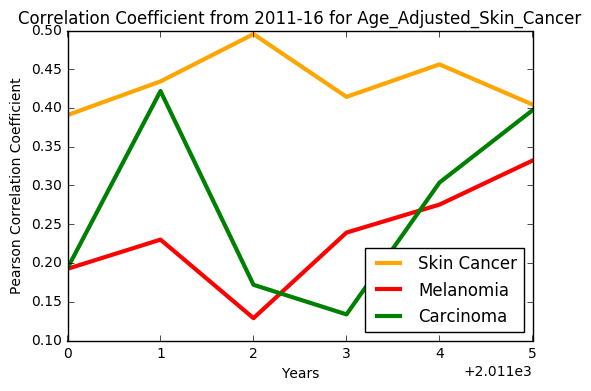

In [10]:
'''Correlation of Google Search Terms with Age_Adjusted_Ground_Truth_Cancer Data from 2011-2016'''
Age_Adj_Temp_Corr = []
for i in range(int(len(Ground_Data)/2)):
    Age_Adj_Temp_Corr.append(find_correlation(np.array(Ground_Data[0:6][i]['Data_Value'],dtype=float),np.array(Skin_Cancer_DF.sort_values('States').iloc[:,i+1],dtype=float)))
for i in range(int(len(Ground_Data)/2)):
    Age_Adj_Temp_Corr.append(find_correlation(np.array(Ground_Data[0:6][i]['Data_Value'],dtype=float),np.array(Melanoma_DF.sort_values('States').iloc[:,i+1],dtype=float)))
for i in range(int(len(Ground_Data)/2)):
    Age_Adj_Temp_Corr.append(find_correlation(np.array(Ground_Data[0:6][i]['Data_Value'],dtype=float),np.array(Carcinoma_DF.sort_values('States').iloc[:,i+1],dtype=float)))
plt.figure(figsize=(6,4))
plt.plot([2011,2012,2013,2014,2015,2016],Age_Adj_Temp_Corr[:6],c='orange',lw=3)
plt.plot([2011,2012,2013,2014,2015,2016],Age_Adj_Temp_Corr[6:12],c='Red',lw=3)
plt.plot([2011,2012,2013,2014,2015,2016],Age_Adj_Temp_Corr[12:],c='Green',lw=3)
plt.xlabel('Years')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Correlation Coefficient from 2011-16 for Age_Adjusted_Skin_Cancer')
plt.legend(['Skin Cancer','Melanomia','Carcinoma'],loc='best')
plt.show()

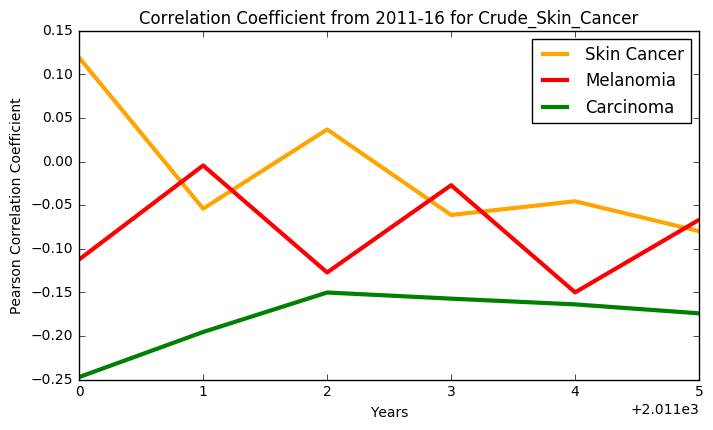

In [11]:
'''Correlation of Google Search Terms with Crude_Ground_Truth_Cancer Data from 2011-2016'''
temp = Ground_Data[6:]
Crude_Temp_Corr = []
for i in range(len(temp)):
    Crude_Temp_Corr.append(find_correlation(np.array(temp[0:6][i]['Data_Value'],dtype=float),np.array(Skin_Cancer_DF.sort_values('States').iloc[:,i+1],dtype=float)))
for i in range(len(temp)):
    Crude_Temp_Corr.append(find_correlation(np.array(temp[0:6][i]['Data_Value'],dtype=float),np.array(Melanoma_DF.sort_values('States').iloc[:,i+1],dtype=float)))
for i in range(len(temp)):
    Crude_Temp_Corr.append(find_correlation(np.array(temp[0:6][i]['Data_Value'],dtype=float),np.array(Carcinoma_DF.sort_values('States').iloc[:,i+1],dtype=float)))
plt.figure(figsize=(8,4.5))
plt.plot([2011,2012,2013,2014,2015,2016],Crude_Temp_Corr[:6],c='orange',lw=3)
plt.plot([2011,2012,2013,2014,2015,2016],Crude_Temp_Corr[6:12],c='Red',lw=3)
plt.plot([2011,2012,2013,2014,2015,2016],Crude_Temp_Corr[12:],c='Green',lw=3)
plt.xlabel('Years')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Correlation Coefficient from 2011-16 for Crude_Skin_Cancer')
plt.legend(['Skin Cancer','Melanomia','Carcinoma'],loc='best')
plt.show()

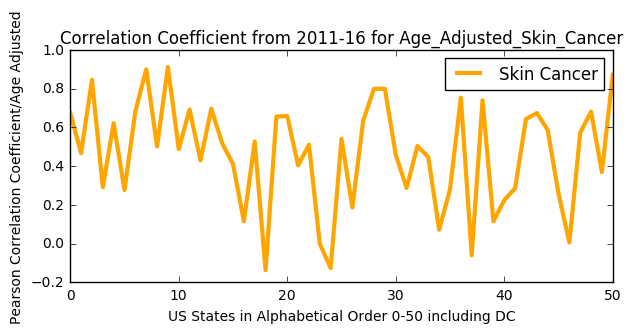

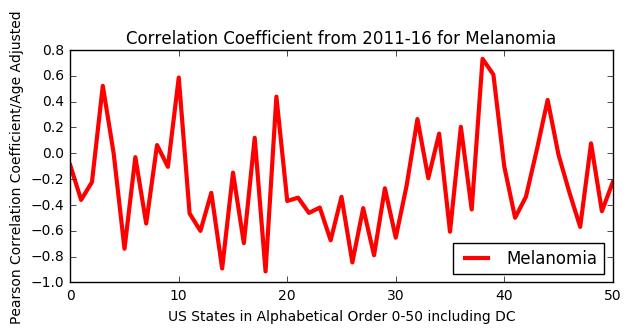

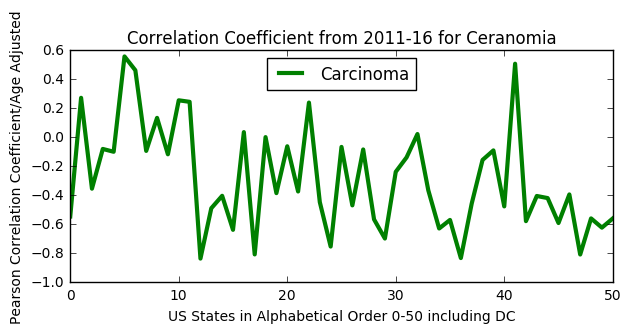

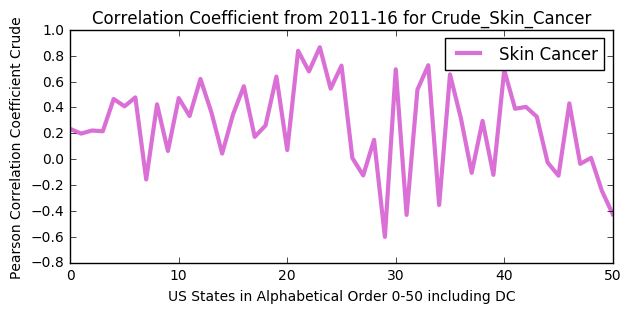

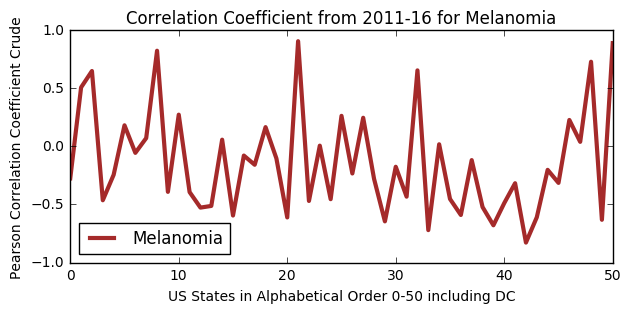

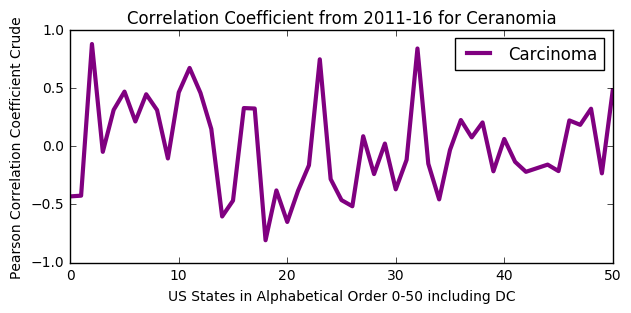

In [12]:
'''Correlation WRT State'''
Age_Adjusted = pd.DataFrame()
for i in range(len(Ground_Data[0:6])):
    Age_Adjusted[str(2011+i)]=Ground_Data[i].iloc[:,1]
Corr_Coeff = []
for index,rows in Skin_Cancer_DF.sort_values('States').iloc[:,1:].iterrows():
    Corr_Coeff.append(find_correlation(np.array(rows,dtype=float),np.array(Age_Adjusted.iloc[i,:],dtype=float)))
for index,rows in Melanoma_DF.sort_values('States').iloc[:,1:].iterrows():
    Corr_Coeff.append(find_correlation(np.array(rows,dtype=float),np.array(Age_Adjusted.iloc[i,:],dtype=float)))
for index,rows in Carcinoma_DF.sort_values('States').iloc[:,1:].iterrows():
    Corr_Coeff.append(find_correlation(np.array(rows,dtype=float),np.array(Age_Adjusted.iloc[i,:],dtype=float)))
plt.figure(figsize=(7,3))
plt.plot(np.arange(51),Corr_Coeff[:51],lw=3,c='orange')
plt.xlabel('US States in Alphabetical Order 0-50 including DC')
plt.ylabel('Pearson Correlation Coefficient/Age Adjusted')
plt.title('Correlation Coefficient from 2011-16 for Age_Adjusted_Skin_Cancer')
plt.legend(['Skin Cancer'],loc='best')
plt.figure(figsize=(7,3))
plt.plot(np.arange(51),Corr_Coeff[51:102],lw=3,c='red')
plt.xlabel('US States in Alphabetical Order 0-50 including DC')
plt.ylabel('Pearson Correlation Coefficient/Age Adjusted')
plt.title('Correlation Coefficient from 2011-16 for Melanomia')
plt.legend(['Melanomia'],loc='best')
plt.figure(figsize=(7,3))
plt.plot(np.arange(51),Corr_Coeff[102:],lw=3,c='green')
plt.xlabel('US States in Alphabetical Order 0-50 including DC')
plt.ylabel('Pearson Correlation Coefficient/Age Adjusted')
plt.title('Correlation Coefficient from 2011-16 for Ceranomia')
plt.legend(['Carcinoma'],loc='best')
plt.show()
Crude = pd.DataFrame()
for i in range(len(temp)):
    Crude[str(2011+i)]=temp[i].iloc[:,1]
Corr_Coeff = []
for index,rows in Skin_Cancer_DF.sort_values('States').iloc[:,1:].iterrows():
    Corr_Coeff.append(find_correlation(np.array(rows,dtype=float),np.array(Crude.iloc[i,:],dtype=float)))
for index,rows in Melanoma_DF.sort_values('States').iloc[:,1:].iterrows():
    Corr_Coeff.append(find_correlation(np.array(rows,dtype=float),np.array(Crude.iloc[i,:],dtype=float)))
for index,rows in Carcinoma_DF.sort_values('States').iloc[:,1:].iterrows():
    Corr_Coeff.append(find_correlation(np.array(rows,dtype=float),np.array(Crude.iloc[i,:],dtype=float)))
plt.figure(figsize=(7,3))
plt.plot(np.arange(51),Corr_Coeff[:51],lw=3,c='orchid')
plt.xlabel('US States in Alphabetical Order 0-50 including DC')
plt.ylabel('Pearson Correlation Coefficient Crude')
plt.title('Correlation Coefficient from 2011-16 for Crude_Skin_Cancer')
plt.legend(['Skin Cancer'],loc='best')
plt.figure(figsize=(7,3))
plt.plot(np.arange(51),Corr_Coeff[51:102],lw=3,c='brown')
plt.xlabel('US States in Alphabetical Order 0-50 including DC')
plt.ylabel('Pearson Correlation Coefficient Crude')
plt.title('Correlation Coefficient from 2011-16 for Melanomia')
plt.legend(['Melanomia'],loc='best')
plt.figure(figsize=(7,3))
plt.plot(np.arange(51),Corr_Coeff[102:],lw=3,c='purple')
plt.xlabel('US States in Alphabetical Order 0-50 including DC')
plt.ylabel('Pearson Correlation Coefficient Crude')
plt.title('Correlation Coefficient from 2011-16 for Ceranomia')
plt.legend(['Carcinoma'],loc='best')
plt.show()

##1.2

In [13]:
'''Take Three Year (2014-2016) Average Poverty Ratio State Wise and find correlation with Ground Data'''
Poverty = pd.read_excel(str(os.getcwd())+'\\Income\\statepov.xls')
Poverty = Poverty.iloc[:,:2]
Poverty.columns = ['States','Poverty Ratio']
Poverty = Poverty.iloc[10:65,:]
Poverty = Poverty[Poverty.isnull().T.any().T!=True]
for index,rows in Poverty.iterrows():
    rows[0] = rows[0].split('.')[0]
Poverty.iloc[8,0]=Poverty.iloc[8,0][:-1]
cor = find_correlation(np.array(Poverty.sort_values('States').iloc[:,1],dtype=int),np.array(Age_Adjusted.iloc[:,3:].mean(axis=1),dtype=int))
print ('Correlation for Avg Poverty Rate and Avg Skin Cancer Rate for 2014-16 (Age Adjusted) is :'+str(cor))
'''Take Three Year (2014-2016) Average Poverty Ratiob State Wise and find correlation with Ground Data/Crude'''
Poverty = pd.read_excel(str(os.getcwd())+'\\Income\\statepov.xls')
Poverty = Poverty.iloc[:,:2]
Poverty.columns = ['States','Poverty Ratio']
Poverty = Poverty.iloc[10:65,:]
Poverty = Poverty[Poverty.isnull().T.any().T!=True]
for index,rows in Poverty.iterrows():
    rows[0] = rows[0].split('.')[0]
Poverty.iloc[8,0]=Poverty.iloc[8,0][:-1]
cor = find_correlation(np.array(Poverty.sort_values('States').iloc[:,1],dtype=int),np.array(Crude.iloc[:,3:].mean(axis=1),dtype=int))
print ('Correlation for Avg Poverty Rate and Avg Skin Cancer Rate for 2014-16 (Crude) is :'+str(cor))

Correlation for Avg Poverty Rate and Avg Skin Cancer Rate for 2014-16 (Age Adjusted) is :0.13972670152
Correlation for Avg Poverty Rate and Avg Skin Cancer Rate for 2014-16 (Crude) is :0.0212815834766


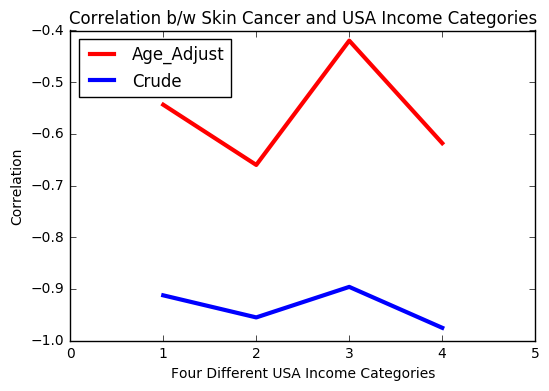

'Note that Category 1 and 3 are for Males, Category 2 and 4 are for Females'

In [14]:
'''Correlation of Different US Income Categories with Ground Truth Skin Cancer'''
Poverty = pd.read_excel(str(os.getcwd())+'\\Income\\tableA4.xlsx')
Poverty = Poverty.iloc[9:16,:]
Poverty = Poverty.drop(Poverty.index[4])
Poverty = Poverty.iloc[:,[0,3,7,13,15]]
Poverty.columns = ['Year','Male_Income_1','Female_Income_1','Male_Income_2','Female_Income_2']
Mean_Skin_Cancer = []
Mean_Skin_Cancer.append(np.mean(np.array(Age_Adjusted.iloc[:,0],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Age_Adjusted.iloc[:,1],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Age_Adjusted.iloc[:,2],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Age_Adjusted.iloc[:,3],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Age_Adjusted.iloc[:,4],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Age_Adjusted.iloc[:,5],dtype=float)))
Corr = []
Corr.append(find_correlation(np.array(Poverty.iloc[:,1],dtype=float), Mean_Skin_Cancer))
Corr.append(find_correlation(np.array(Poverty.iloc[:,2],dtype=float), Mean_Skin_Cancer))
Corr.append(find_correlation(np.array(Poverty.iloc[:,3],dtype=float), Mean_Skin_Cancer))
Corr.append(find_correlation(np.array(Poverty.iloc[:,4],dtype=float), Mean_Skin_Cancer))
plt.plot([1,2,3,4],Corr,c='red',lw=3)
Mean_Skin_Cancer = []
Mean_Skin_Cancer.append(np.mean(np.array(Crude.iloc[:,0],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Crude.iloc[:,1],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Crude.iloc[:,2],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Crude.iloc[:,3],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Crude.iloc[:,4],dtype=float)))
Mean_Skin_Cancer.append(np.mean(np.array(Crude.iloc[:,5],dtype=float)))
Corr1 = []
Corr1.append(find_correlation(np.array(Poverty.iloc[:,1],dtype=float), Mean_Skin_Cancer))
Corr1.append(find_correlation(np.array(Poverty.iloc[:,2],dtype=float), Mean_Skin_Cancer))
Corr1.append(find_correlation(np.array(Poverty.iloc[:,3],dtype=float), Mean_Skin_Cancer))
Corr1.append(find_correlation(np.array(Poverty.iloc[:,4],dtype=float), Mean_Skin_Cancer))
plt.plot([1,2,3,4],Corr1,c='blue',lw=3)
plt.xlabel('Four Different USA Income Categories')
plt.xlim(0,5)
plt.ylabel('Correlation')
plt.title('Correlation b/w Skin Cancer and USA Income Categories')
plt.legend(['Age_Adjust','Crude'],loc='best')
plt.show()
'''Note that Category 1 and 3 are for Males, Category 2 and 4 are for Females'''

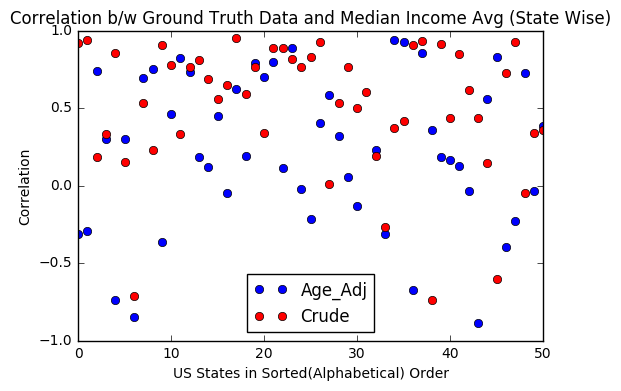

In [15]:
Poverty = pd.read_csv(str(os.getcwd())+'\\Income\\Income.csv')
Poverty = Poverty.iloc[:,1:]
Poverty = Poverty[Poverty.isnull().T.any().T!=True]
Poverty = Poverty.drop(Poverty.index[20])
for index,rows in Poverty.iterrows():
    rows[1] = int(rows[1].split(',')[0][1:]+rows[1].split(',')[1][:-1])
    rows[2] = int(rows[2].split(',')[0]+rows[2].split(',')[1])
    rows[3] = int(rows[3].split(',')[0][1:]+rows[3].split(',')[1][:-1])
    rows[4] = int(rows[4].split(',')[0][1:]+rows[4].split(',')[1][:-1])
    rows[5] = int(rows[5].split(',')[0][1:]+rows[5].split(',')[1][:-1])
Corr = []
for i in range(len(Poverty)):
    Corr.append(find_correlation(np.array(Poverty.sort_values('State').iloc[i,1:],dtype=float),np.array(Age_Adjusted.iloc[i,:-1],dtype=float)[::-1]))
plt.plot(np.arange(51),Corr,'ro',c='blue')
Corr = []
for i in range(len(Poverty)):
    Corr.append(find_correlation(np.array(Poverty.sort_values('State').iloc[i,1:],dtype=float),np.array(Crude.iloc[i,:-1],dtype=float)[::-1]))
plt.plot(np.arange(51),Corr,'ro',c='red')
plt.xlabel('US States in Sorted(Alphabetical) Order')
plt.ylabel('Correlation')
plt.title('Correlation b/w Ground Truth Data and Median Income Avg (State Wise)')
plt.legend(['Age_Adj','Crude'],loc='best')
plt.show()

##2.1

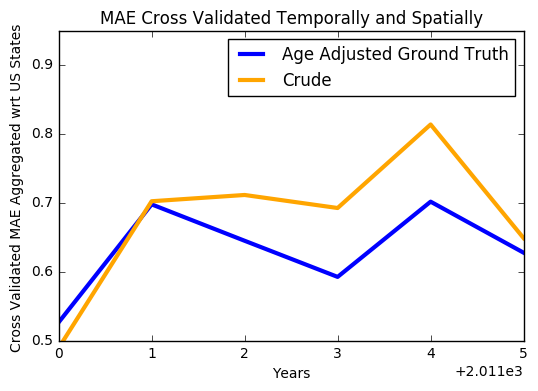

In [16]:
'''Build The Training and Test Data Sets'''
Skin_Cancer_DF = Skin_Cancer_DF.sort_values('States')
Skin_Cancer_DF.columns = ['States','S_2011','S_2012','S_2013','S_2014','S_2015','S_2016']
Melanoma_DF= Melanoma_DF.sort_values('States')
Melanoma_DF.columns = ['States','M_2011','M_2012','M_2013','M_2014','M_2015','M_2016']
Carcinoma_DF = Carcinoma_DF.sort_values('States')
Carcinoma_DF.columns = ['States','C_2011','C_2012','C_2013','C_2014','C_2015','C_2016']
Data = pd.DataFrame()
Data['States'] = Skin_Cancer_DF['States']
Data['S_2011'] = pd.Series(np.array( Skin_Cancer_DF['S_2011']),index=Data.index)
Data['S_2012'] = pd.Series(np.array( Skin_Cancer_DF['S_2012']),index=Data.index)
Data['S_2013'] = pd.Series(np.array( Skin_Cancer_DF['S_2013']),index=Data.index)
Data['S_2014'] = pd.Series(np.array( Skin_Cancer_DF['S_2014']),index=Data.index)
Data['S_2015'] = pd.Series(np.array( Skin_Cancer_DF['S_2015']),index=Data.index)
Data['S_2016'] = pd.Series(np.array( Skin_Cancer_DF['S_2016']),index=Data.index)
Data['M_2011'] = pd.Series(np.array( Melanoma_DF['M_2011']),index=Data.index)
Data['M_2012'] = pd.Series(np.array( Melanoma_DF['M_2012']),index=Data.index)
Data['M_2013'] = pd.Series(np.array( Melanoma_DF['M_2013']),index=Data.index)
Data['M_2014'] = pd.Series(np.array( Melanoma_DF['M_2014']),index=Data.index)
Data['M_2015'] = pd.Series(np.array( Melanoma_DF['M_2015']),index=Data.index)
Data['M_2016'] = pd.Series(np.array( Melanoma_DF['M_2016']),index=Data.index)
Data['C_2011'] = pd.Series(np.array( Carcinoma_DF['C_2011']),index=Data.index)
Data['C_2012'] = pd.Series(np.array( Carcinoma_DF['C_2012']),index=Data.index)
Data['C_2013'] = pd.Series(np.array( Carcinoma_DF['C_2013']),index=Data.index)
Data['C_2014'] = pd.Series(np.array( Carcinoma_DF['C_2014']),index=Data.index)
Data['C_2015'] = pd.Series(np.array( Carcinoma_DF['C_2015']),index=Data.index)
Data['C_2016'] = pd.Series(np.array( Carcinoma_DF['C_2016']),index=Data.index)
Data['A_A_S_2011'] = pd.Series(np.array(Age_Adjusted['2011']),index=Data.index)
Data['A_A_S_2012'] = pd.Series(np.array(Age_Adjusted['2012']),index=Data.index)
Data['A_A_S_2013'] = pd.Series(np.array(Age_Adjusted['2013']),index=Data.index)
Data['A_A_S_2014'] = pd.Series(np.array(Age_Adjusted['2014']),index=Data.index)
Data['A_A_S_2015'] = pd.Series(np.array(Age_Adjusted['2015']),index=Data.index)
Data['A_A_S_2016'] = pd.Series(np.array(Age_Adjusted['2016']),index=Data.index)
Data['C_S_2011'] = pd.Series(np.array(Crude['2011']),index=Data.index)
Data['C_S_2012'] = pd.Series(np.array(Crude['2012']),index=Data.index)
Data['C_S_2013'] = pd.Series(np.array(Crude['2013']),index=Data.index)
Data['C_S_2014'] = pd.Series(np.array(Crude['2014']),index=Data.index)
Data['C_S_2015'] = pd.Series(np.array(Crude['2015']),index=Data.index)
Data['C_S_2016'] = pd.Series(np.array(Crude['2016']),index=Data.index)
Data.iloc[:,1:19] = min_max_scale(Data.iloc[:,1:19])
Data.set_index('States',inplace=True)
Data_Sets = Build_Data_Sets(Data)
Age_Adjusted_Prediction = lasso_Regression_Age_Adjusted(Data_Sets)
Crude_Prediction = lasso_Regression_Crude(Data_Sets)
for df in Age_Adjusted_Prediction:
    df['Error'] = pd.Series(MAE(df),index=df.index)
for df in Crude_Prediction:
    df['Error'] = pd.Series(MAE(df),index=df.index)
MAE_Adjusted = []
MAE_Crude = []
for data in Age_Adjusted_Prediction:
    MAE_Adjusted.append(np.mean(data['Error']))
for data in Crude_Prediction:
    MAE_Crude.append(np.mean(data['Error']))
plt.plot(np.array([2011,2012,2013,2014,2015,2016],dtype=str),MAE_Adjusted,c='blue',lw=3)
plt.plot(np.array([2011,2012,2013,2014,2015,2016],dtype=str),MAE_Crude,c='orange',lw=3)
plt.xlabel('Years')
plt.ylabel('Cross Validated MAE Aggregated wrt US States ')
plt.title('MAE Cross Validated Temporally and Spatially')
plt.legend(['Age Adjusted Ground Truth','Crude'],loc='best')
plt.xlim(2011,2016)
plt.ylim(0.5,0.95)
plt.show()

##2.2

Age Adjusted Done
Crude Done


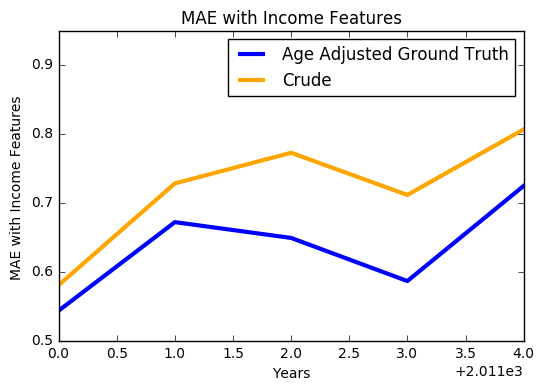

In [22]:
'''Build The Training and Test Data Sets'''
Skin_Cancer_DF = Skin_Cancer_DF.sort_values('States')
Skin_Cancer_DF.columns = ['States','S_2011','S_2012','S_2013','S_2014','S_2015','S_2016']
Melanoma_DF= Melanoma_DF.sort_values('States')
Melanoma_DF.columns = ['States','M_2011','M_2012','M_2013','M_2014','M_2015','M_2016']
Carcinoma_DF = Carcinoma_DF.sort_values('States')
Carcinoma_DF.columns = ['States','C_2011','C_2012','C_2013','C_2014','C_2015','C_2016']
Data = pd.DataFrame()
Data['States'] = Skin_Cancer_DF['States']
Data['S_2011'] = pd.Series(np.array( Skin_Cancer_DF['S_2011']),index=Data.index)
Data['S_2012'] = pd.Series(np.array( Skin_Cancer_DF['S_2012']),index=Data.index)
Data['S_2013'] = pd.Series(np.array( Skin_Cancer_DF['S_2013']),index=Data.index)
Data['S_2014'] = pd.Series(np.array( Skin_Cancer_DF['S_2014']),index=Data.index)
Data['S_2015'] = pd.Series(np.array( Skin_Cancer_DF['S_2015']),index=Data.index)
Data['M_2011'] = pd.Series(np.array( Melanoma_DF['M_2011']),index=Data.index)
Data['M_2012'] = pd.Series(np.array( Melanoma_DF['M_2012']),index=Data.index)
Data['M_2013'] = pd.Series(np.array( Melanoma_DF['M_2013']),index=Data.index)
Data['M_2014'] = pd.Series(np.array( Melanoma_DF['M_2014']),index=Data.index)
Data['M_2015'] = pd.Series(np.array( Melanoma_DF['M_2015']),index=Data.index)
Data['C_2011'] = pd.Series(np.array( Carcinoma_DF['C_2011']),index=Data.index)
Data['C_2012'] = pd.Series(np.array( Carcinoma_DF['C_2012']),index=Data.index)
Data['C_2013'] = pd.Series(np.array( Carcinoma_DF['C_2013']),index=Data.index)
Data['C_2014'] = pd.Series(np.array( Carcinoma_DF['C_2014']),index=Data.index)
Data['C_2015'] = pd.Series(np.array( Carcinoma_DF['C_2015']),index=Data.index)
Poverty = Poverty.sort_values('State')
Data['I_2011'] = pd.Series(np.array(Poverty['2011']),index=Data.index)
Data['I_2012'] = pd.Series(np.array(Poverty['2012']),index=Data.index)
Data['I_2013'] = pd.Series(np.array(Poverty['2013']),index=Data.index)
Data['I_2014'] = pd.Series(np.array(Poverty['2014']),index=Data.index)
Data['I_2015'] = pd.Series(np.array(Poverty['2015']),index=Data.index)
Data['A_A_S_2011'] = pd.Series(np.array(Age_Adjusted['2011']),index=Data.index)
Data['A_A_S_2012'] = pd.Series(np.array(Age_Adjusted['2012']),index=Data.index)
Data['A_A_S_2013'] = pd.Series(np.array(Age_Adjusted['2013']),index=Data.index)
Data['A_A_S_2014'] = pd.Series(np.array(Age_Adjusted['2014']),index=Data.index)
Data['A_A_S_2015'] = pd.Series(np.array(Age_Adjusted['2015']),index=Data.index)
Data['C_S_2011'] = pd.Series(np.array(Crude['2011']),index=Data.index)
Data['C_S_2012'] = pd.Series(np.array(Crude['2012']),index=Data.index)
Data['C_S_2013'] = pd.Series(np.array(Crude['2013']),index=Data.index)
Data['C_S_2014'] = pd.Series(np.array(Crude['2014']),index=Data.index)
Data['C_S_2015'] = pd.Series(np.array(Crude['2015']),index=Data.index)
Data.iloc[:,1:19] = min_max_scale(Data.iloc[:,1:19])
Data_Sets = Build_Data_Sets(Data)[0:5]
Age_Adjusted_Prediction = lasso_Regression_Age_Adjusted_Income(Data_Sets)
print('Age Adjusted Done')
Crude_Prediction = lasso_Regression_Crude_Income(Data_Sets)
print('Crude Done')
for df in Age_Adjusted_Prediction:
    df['Error'] = pd.Series(MAE(df),index=df.index)
for df in Crude_Prediction:
    df['Error'] = pd.Series(MAE(df),index=df.index)
MAE_Adjusted = []
MAE_Crude = []
for data in Age_Adjusted_Prediction:
    MAE_Adjusted.append(np.mean(data['Error']))
for data in Crude_Prediction:
    MAE_Crude.append(np.mean(data['Error']))
plt.plot(np.array([2011,2012,2013,2014,2015],dtype=str),MAE_Adjusted,c='blue',lw=3)
plt.plot(np.array([2011,2012,2013,2014,2015],dtype=str),MAE_Crude,c='orange',lw=3)
plt.xlabel('Years')
plt.ylabel('MAE with Income Features ')
plt.title('MAE with Income Features')
plt.legend(['Age Adjusted Ground Truth','Crude'],loc='best')
plt.xlim(2011,2015)
plt.ylim(0.5,0.95)
plt.show()

##2.3

Age Adjusted Done
Crude Done


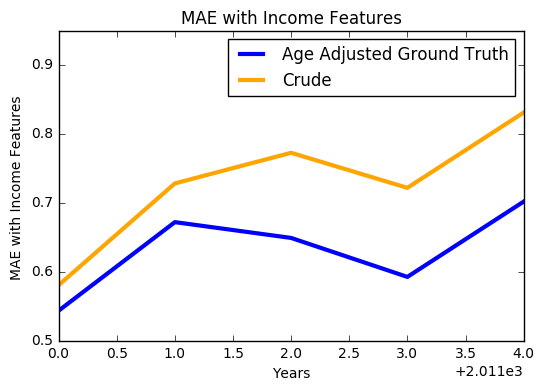

In [25]:
Health_Insurance = pd.read_excel(os.getcwd()+'\\Health Insurance\\1993.xlsx')
Health_Insurance = Health_Insurance.iloc[:,[0,13,14,15,16,17]]
Health_Insurance.columns=['States','2011','2012','2013','2014','2015']
Health_Insurance = Health_Insurance.iloc[2:,:]
'''Build The Training and Test Data Sets'''
Skin_Cancer_DF = Skin_Cancer_DF.sort_values('States')
Skin_Cancer_DF.columns = ['States','S_2011','S_2012','S_2013','S_2014','S_2015','S_2016']
Melanoma_DF= Melanoma_DF.sort_values('States')
Melanoma_DF.columns = ['States','M_2011','M_2012','M_2013','M_2014','M_2015','M_2016']
Carcinoma_DF = Carcinoma_DF.sort_values('States')
Carcinoma_DF.columns = ['States','C_2011','C_2012','C_2013','C_2014','C_2015','C_2016']
Data = pd.DataFrame()
Data['States'] = Skin_Cancer_DF['States']
Data['S_2011'] = pd.Series(np.array( Skin_Cancer_DF['S_2011']),index=Data.index)
Data['S_2012'] = pd.Series(np.array( Skin_Cancer_DF['S_2012']),index=Data.index)
Data['S_2013'] = pd.Series(np.array( Skin_Cancer_DF['S_2013']),index=Data.index)
Data['S_2014'] = pd.Series(np.array( Skin_Cancer_DF['S_2014']),index=Data.index)
Data['S_2015'] = pd.Series(np.array( Skin_Cancer_DF['S_2015']),index=Data.index)
Data['M_2011'] = pd.Series(np.array( Melanoma_DF['M_2011']),index=Data.index)
Data['M_2012'] = pd.Series(np.array( Melanoma_DF['M_2012']),index=Data.index)
Data['M_2013'] = pd.Series(np.array( Melanoma_DF['M_2013']),index=Data.index)
Data['M_2014'] = pd.Series(np.array( Melanoma_DF['M_2014']),index=Data.index)
Data['M_2015'] = pd.Series(np.array( Melanoma_DF['M_2015']),index=Data.index)
Data['C_2011'] = pd.Series(np.array( Carcinoma_DF['C_2011']),index=Data.index)
Data['C_2012'] = pd.Series(np.array( Carcinoma_DF['C_2012']),index=Data.index)
Data['C_2013'] = pd.Series(np.array( Carcinoma_DF['C_2013']),index=Data.index)
Data['C_2014'] = pd.Series(np.array( Carcinoma_DF['C_2014']),index=Data.index)
Data['C_2015'] = pd.Series(np.array( Carcinoma_DF['C_2015']),index=Data.index)
Poverty = Poverty.sort_values('State')
Data['I_2011'] = pd.Series(np.array(Poverty['2011']),index=Data.index)
Data['I_2012'] = pd.Series(np.array(Poverty['2012']),index=Data.index)
Data['I_2013'] = pd.Series(np.array(Poverty['2013']),index=Data.index)
Data['I_2014'] = pd.Series(np.array(Poverty['2014']),index=Data.index)
Data['I_2015'] = pd.Series(np.array(Poverty['2015']),index=Data.index)
Data['H_2011'] = pd.Series(np.array(Health_Insurance['2011']),index=Data.index)
Data['H_2012'] = pd.Series(np.array(Health_Insurance['2012']),index=Data.index)
Data['H_2013'] = pd.Series(np.array(Health_Insurance['2013']),index=Data.index)
Data['H_2014'] = pd.Series(np.array(Health_Insurance['2014']),index=Data.index)
Data['H_2015'] = pd.Series(np.array(Health_Insurance['2015']),index=Data.index)
Data['A_A_S_2011'] = pd.Series(np.array(Age_Adjusted['2011']),index=Data.index)
Data['A_A_S_2012'] = pd.Series(np.array(Age_Adjusted['2012']),index=Data.index)
Data['A_A_S_2013'] = pd.Series(np.array(Age_Adjusted['2013']),index=Data.index)
Data['A_A_S_2014'] = pd.Series(np.array(Age_Adjusted['2014']),index=Data.index)
Data['A_A_S_2015'] = pd.Series(np.array(Age_Adjusted['2015']),index=Data.index)
Data['C_S_2011'] = pd.Series(np.array(Crude['2011']),index=Data.index)
Data['C_S_2012'] = pd.Series(np.array(Crude['2012']),index=Data.index)
Data['C_S_2013'] = pd.Series(np.array(Crude['2013']),index=Data.index)
Data['C_S_2014'] = pd.Series(np.array(Crude['2014']),index=Data.index)
Data['C_S_2015'] = pd.Series(np.array(Crude['2015']),index=Data.index)
Data.iloc[:,1:26] = min_max_scale(Data.iloc[:,1:26])
Data.set_index('States',inplace=True)
Data_Sets = Build_Data_Sets(Data)[0:5]
Age_Adjusted_Prediction = lasso_Regression_Age_Adjusted_Health(Data_Sets)
print('Age Adjusted Done')
Crude_Prediction = lasso_Regression_Crude_Health(Data_Sets)
print('Crude Done')
for df in Age_Adjusted_Prediction:
    df['Error'] = pd.Series(MAE(df),index=df.index)
for df in Crude_Prediction:
    df['Error'] = pd.Series(MAE(df),index=df.index)
MAE_Adjusted = []
MAE_Crude = []
for data in Age_Adjusted_Prediction:
    MAE_Adjusted.append(np.mean(data['Error']))
for data in Crude_Prediction:
    MAE_Crude.append(np.mean(data['Error']))
plt.plot(np.array([2011,2012,2013,2014,2015],dtype=str),MAE_Adjusted,c='blue',lw=3)
plt.plot(np.array([2011,2012,2013,2014,2015],dtype=str),MAE_Crude,c='orange',lw=3)
plt.xlabel('Years')
plt.ylabel('MAE with Income Features ')
plt.title('MAE with Income Features')
plt.legend(['Age Adjusted Ground Truth','Crude'],loc='best')
plt.xlim(2011,2015)
plt.ylim(0.5,0.95)
plt.show()